In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [24]:
torch.manual_seed(42)

In [25]:
df = pd.read_csv('data/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


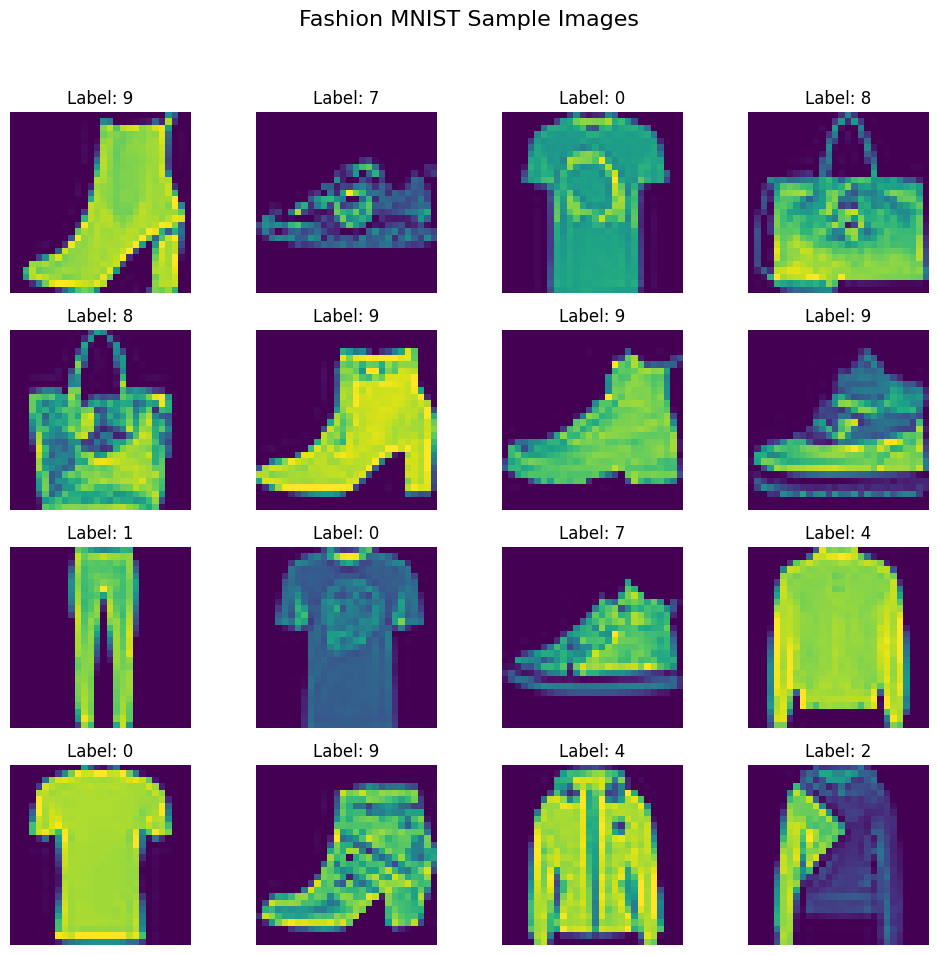

In [26]:
# Create a 4x4 grid of images

fig, axes = plt.subplots(4, 4, figsize=(10,10))
fig.suptitle('Fashion MNIST Sample Images', fontsize=16)

# Plotting 16 images
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.set_title(f'Label: {df.iloc[i, 0]}')
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [27]:
# train-test split

X = df.iloc[:, 1:].values # features
y = df.iloc[:, 0].values # labels

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# scalling the data 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]], shape=(4800, 784))

In [31]:
# x_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)

In [32]:
# Create CustomDataset class

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)
    

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [33]:
# create dataset instances
train_dataset = CustomDataset(X_train, y_train)

In [34]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [35]:
test_dataset = CustomDataset(X_test, y_test)

In [36]:
# crete train and dataloaders

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [37]:
# Define NN class

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [38]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.01

In [39]:
# insitiate the mdoel

model = SimpleNN(input_size=784, hidden_size=128, num_classes=10)   

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [40]:
len(train_loader)

150

In [41]:
# training loop

for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        total_epoch_loss += loss.item()

    avg_epoch_loss = total_epoch_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}')
    

Epoch [1/100], Loss: 1.9536
Epoch [2/100], Loss: 1.3583
Epoch [3/100], Loss: 1.0734
Epoch [4/100], Loss: 0.9416
Epoch [5/100], Loss: 0.8631
Epoch [6/100], Loss: 0.8103
Epoch [7/100], Loss: 0.7684
Epoch [8/100], Loss: 0.7351
Epoch [9/100], Loss: 0.7083
Epoch [10/100], Loss: 0.6844
Epoch [11/100], Loss: 0.6626
Epoch [12/100], Loss: 0.6438
Epoch [13/100], Loss: 0.6251
Epoch [14/100], Loss: 0.6112
Epoch [15/100], Loss: 0.5951
Epoch [16/100], Loss: 0.5838
Epoch [17/100], Loss: 0.5699
Epoch [18/100], Loss: 0.5616
Epoch [19/100], Loss: 0.5498
Epoch [20/100], Loss: 0.5403
Epoch [21/100], Loss: 0.5336
Epoch [22/100], Loss: 0.5266
Epoch [23/100], Loss: 0.5195
Epoch [24/100], Loss: 0.5106
Epoch [25/100], Loss: 0.5028
Epoch [26/100], Loss: 0.4988
Epoch [27/100], Loss: 0.4922
Epoch [28/100], Loss: 0.4879
Epoch [29/100], Loss: 0.4812
Epoch [30/100], Loss: 0.4763
Epoch [31/100], Loss: 0.4709
Epoch [32/100], Loss: 0.4671
Epoch [33/100], Loss: 0.4615
Epoch [34/100], Loss: 0.4553
Epoch [35/100], Loss: 0

In [42]:
# set model to evaluation mode

model.eval()

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [43]:
# evaluate the model

total = 0
correct = 0

with torch.no_grad():

    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = 100 * correct / total

print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

Accuracy of the model on the test set: 83.25%


In [44]:
len(train_loader)

150